In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = ['clean']
product = None

In [2]:
# Parameters
upstream = {
    "clean": {
        "nb": "C:\\Users\\Admin\\pipeline_project\\products\\clean.ipynb",
        "data": "C:\\Users\\Admin\\pipeline_project\\products\\clean.csv",
    }
}
product = {
    "nb": "C:\\Users\\Admin\\pipeline_project\\products\\preprocess.ipynb",
    "data": "C:\\Users\\Admin\\pipeline_project\\products\\preprocess.csv",
}


In [3]:
# Parameters
upstream = {
    "clean": {
    "nb": "C:\\Users\\Admin\\pipeline_project\\products\\clean.ipynb",
    "data": "C:\\Users\\Admin\\pipeline_project\\products\\clean.csv",
    }
}

product = {
    "nb": "C:\\Users\\Admin\\pipeline_project\\products\\preprocess.ipynb",
    "data": "C:\\Users\\Admin\\pipeline_project\\products\\preprocess.csv",
}

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

In [5]:
datacleaned = pd.read_csv(upstream['clean']['data'])

# Correlation between features  

In [6]:
data = pd.read_csv("C:\\Users\\Admin\\rmit\\pactical daata science\\Assignment3\\pipeline\\CustomerChurn.csv")
data.columns = map(str.lower,data.columns)

In [7]:
y = data['churn'].copy()
X = datacleaned.copy()

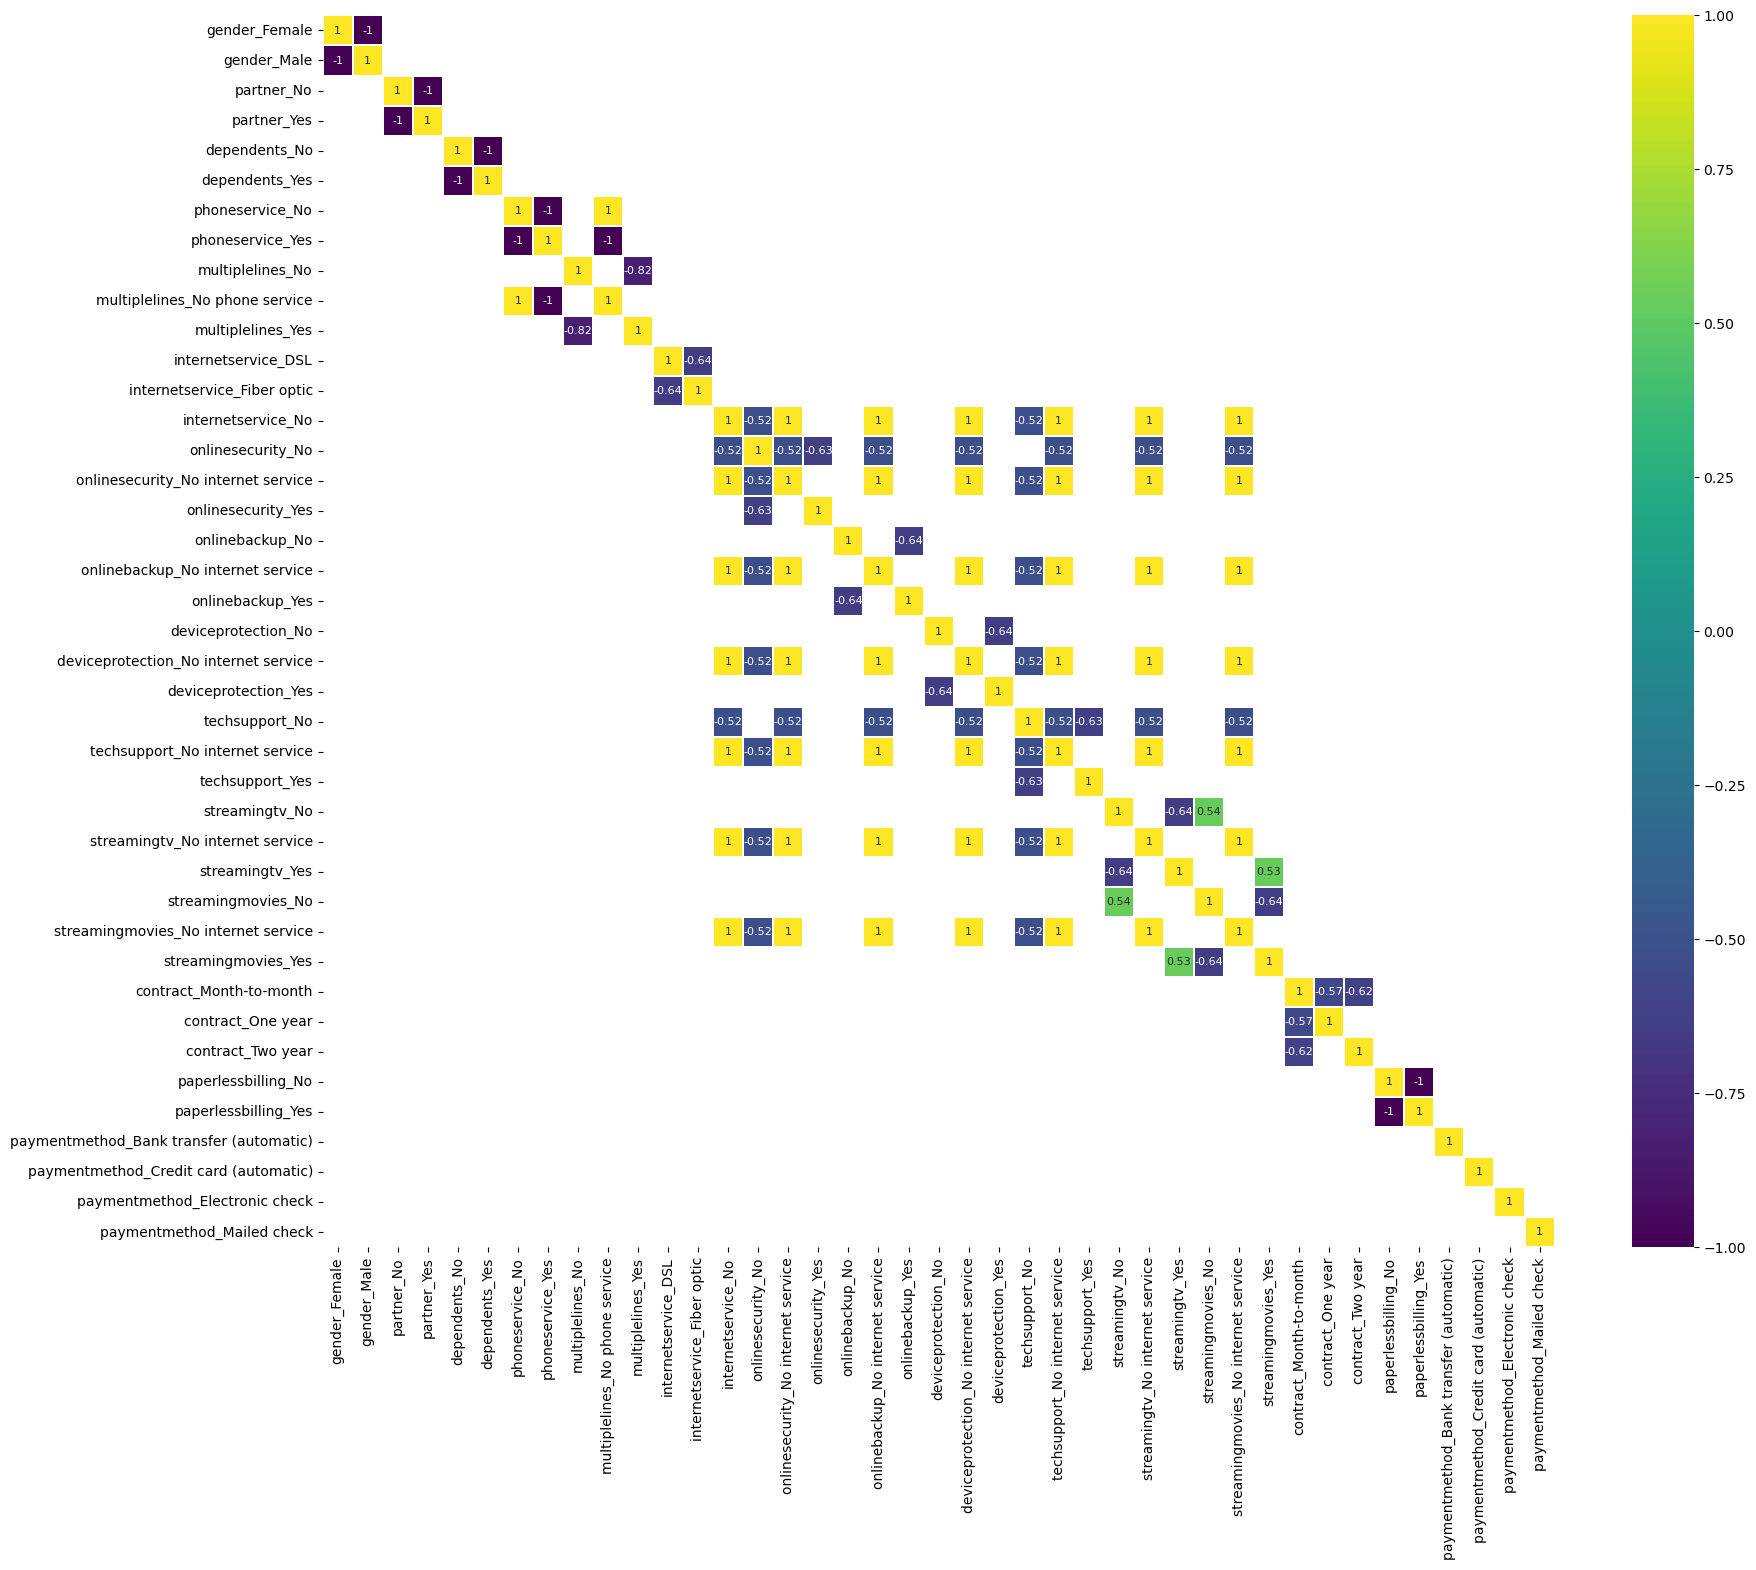

In [8]:
#seaborn palletes at https://seaborn.pydata.org/tutorial/color_palettes.html
corr = X.corr() # Examine correlations
plt.figure(figsize=(20, 16))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Features Overview

In [9]:
for i in X.columns:
    print('Feature: ',i)
    print ('# of N/A: ', X[i].isna().sum())

Feature:  gender_Female
# of N/A:  0
Feature:  gender_Male
# of N/A:  0
Feature:  partner_No
# of N/A:  0
Feature:  partner_Yes
# of N/A:  0
Feature:  dependents_No
# of N/A:  0
Feature:  dependents_Yes
# of N/A:  0
Feature:  phoneservice_No
# of N/A:  0
Feature:  phoneservice_Yes
# of N/A:  0
Feature:  multiplelines_No
# of N/A:  0
Feature:  multiplelines_No phone service
# of N/A:  0
Feature:  multiplelines_Yes
# of N/A:  0
Feature:  internetservice_DSL
# of N/A:  0
Feature:  internetservice_Fiber optic
# of N/A:  0
Feature:  internetservice_No
# of N/A:  0
Feature:  onlinesecurity_No
# of N/A:  0
Feature:  onlinesecurity_No internet service
# of N/A:  0
Feature:  onlinesecurity_Yes
# of N/A:  0
Feature:  onlinebackup_No
# of N/A:  0
Feature:  onlinebackup_No internet service
# of N/A:  0
Feature:  onlinebackup_Yes
# of N/A:  0
Feature:  deviceprotection_No
# of N/A:  0
Feature:  deviceprotection_No internet service
# of N/A:  0
Feature:  deviceprotection_Yes
# of N/A:  0
Feature:  t

### Gender

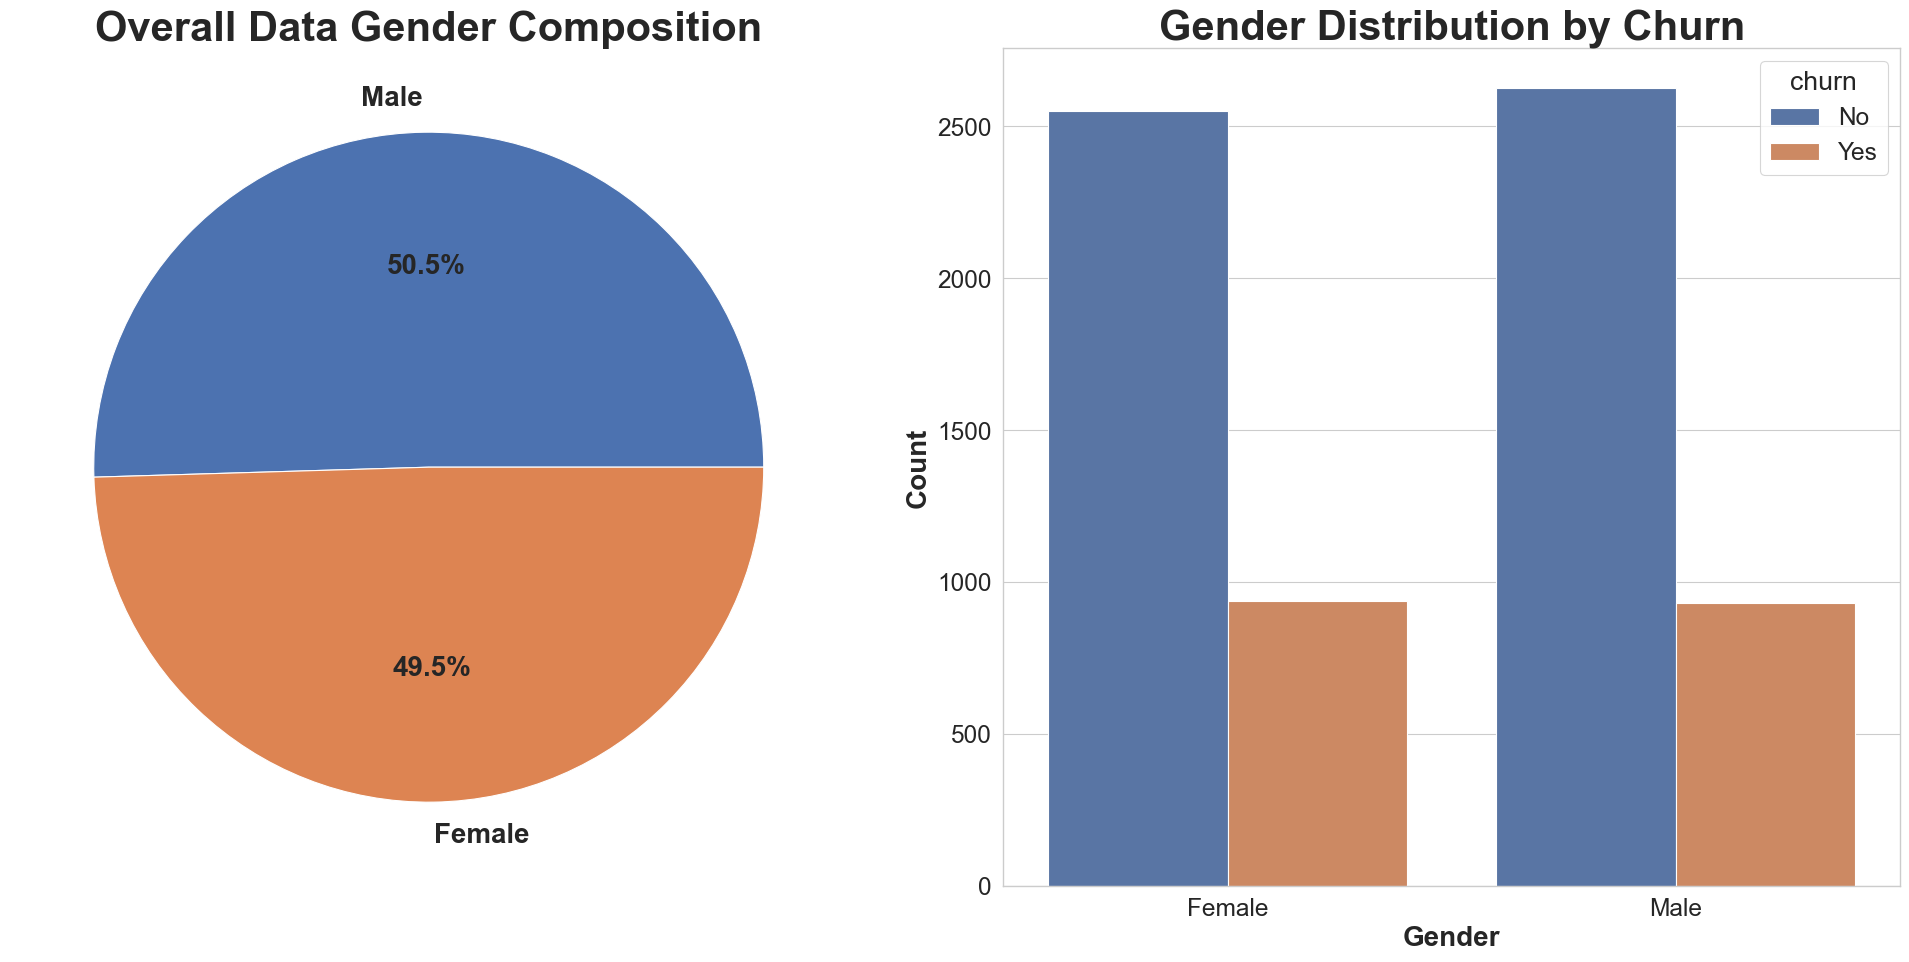

In [10]:
def gender_plot(data):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(data.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = data, x = 'gender', hue = 'churn')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    
    plt.tight_layout()
gender_plot(data)

<b>Gender</b> is equivalent and does not have big impact on posibility to churn.

### Partner & Dependents

Text(0.5, 0, '')

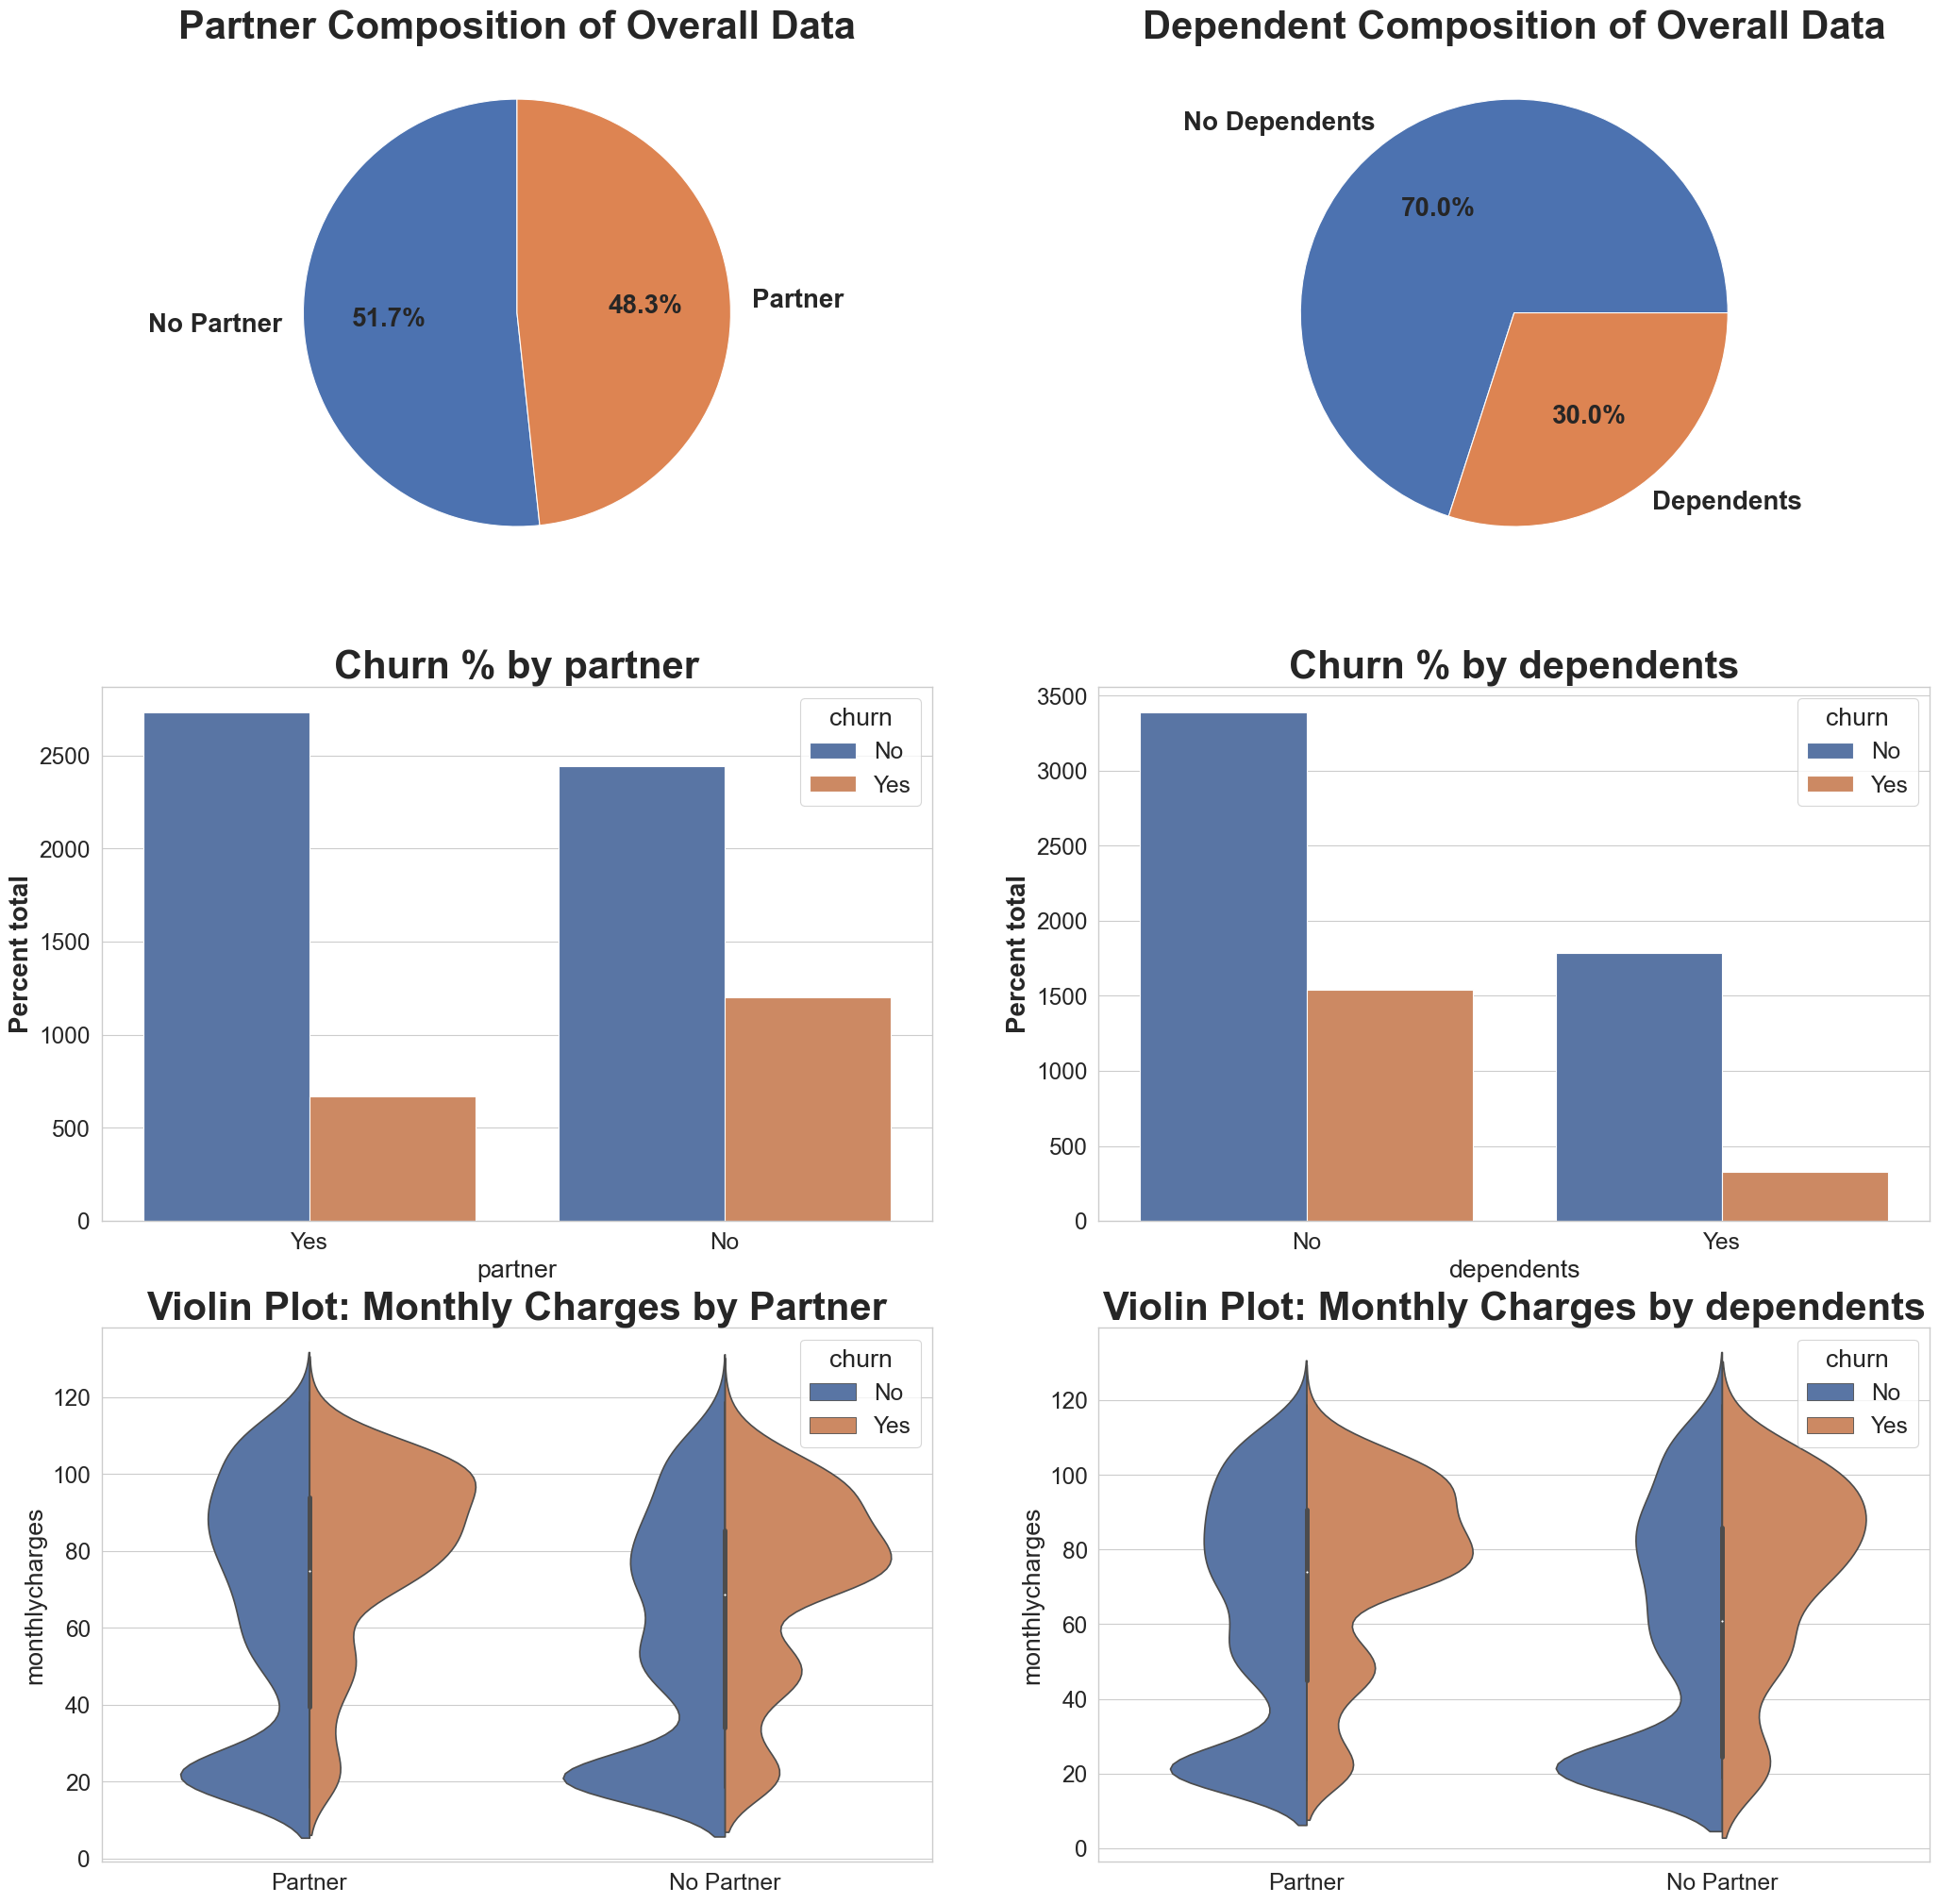

In [11]:
fig = plt.figure(figsize = (25,25))
x = data.copy()
plt.subplot(321)
plt.pie(data.partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = 90)
plt.title('Partner Composition of Overall Data', fontweight = 'bold', fontsize = 30)

plt.subplot(322)
plt.pie(data.dependents.value_counts(), labels = ['No Dependents', 'Dependents'], autopct = '%.1f%%', radius = 1,  textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Dependent Composition of Overall Data', fontsize = 30, fontweight = 'bold')
    
plt.subplot(323)
a = sns.countplot(data = data, x = 'partner', hue = 'churn')
a.set_title('Churn % by partner', fontsize = 30, fontweight = 'bold')
a.set_ylabel('Percent total', fontweight = 'bold', fontsize = 20)

plt.subplot(324)
b = sns.countplot(data = data, x = 'dependents', hue = 'churn')
b.set_title('Churn % by dependents', fontsize = 30, fontweight = 'bold')
b.set_ylabel('Percent total', fontweight = 'bold', fontsize = 20)

plt.subplot(325)
c = sns.violinplot(data = data, x = 'partner', y =  'monthlycharges', hue = 'churn', split = True)
c.set_title('Violin Plot: Monthly Charges by Partner', fontweight = 'bold', fontsize = 30)
c.set_xticklabels(['Partner', 'No Partner'])
c.set_xlabel('')
    
plt.subplot(326)
c = sns.violinplot(data = data, x = 'dependents', y =  'monthlycharges', hue = 'churn', split = True)
c.set_title('Violin Plot: Monthly Charges by dependents', fontweight = 'bold', fontsize = 30)
c.set_xticklabels(['Partner', 'No Partner'])
c.set_xlabel('')


* Customers without partners are more likely to churn.
* Customers without dependents are more likely to churn.

### Phone Services & Line Quantities

Text(0.5, 0.98, 'Phone Services -  Line Quantity')

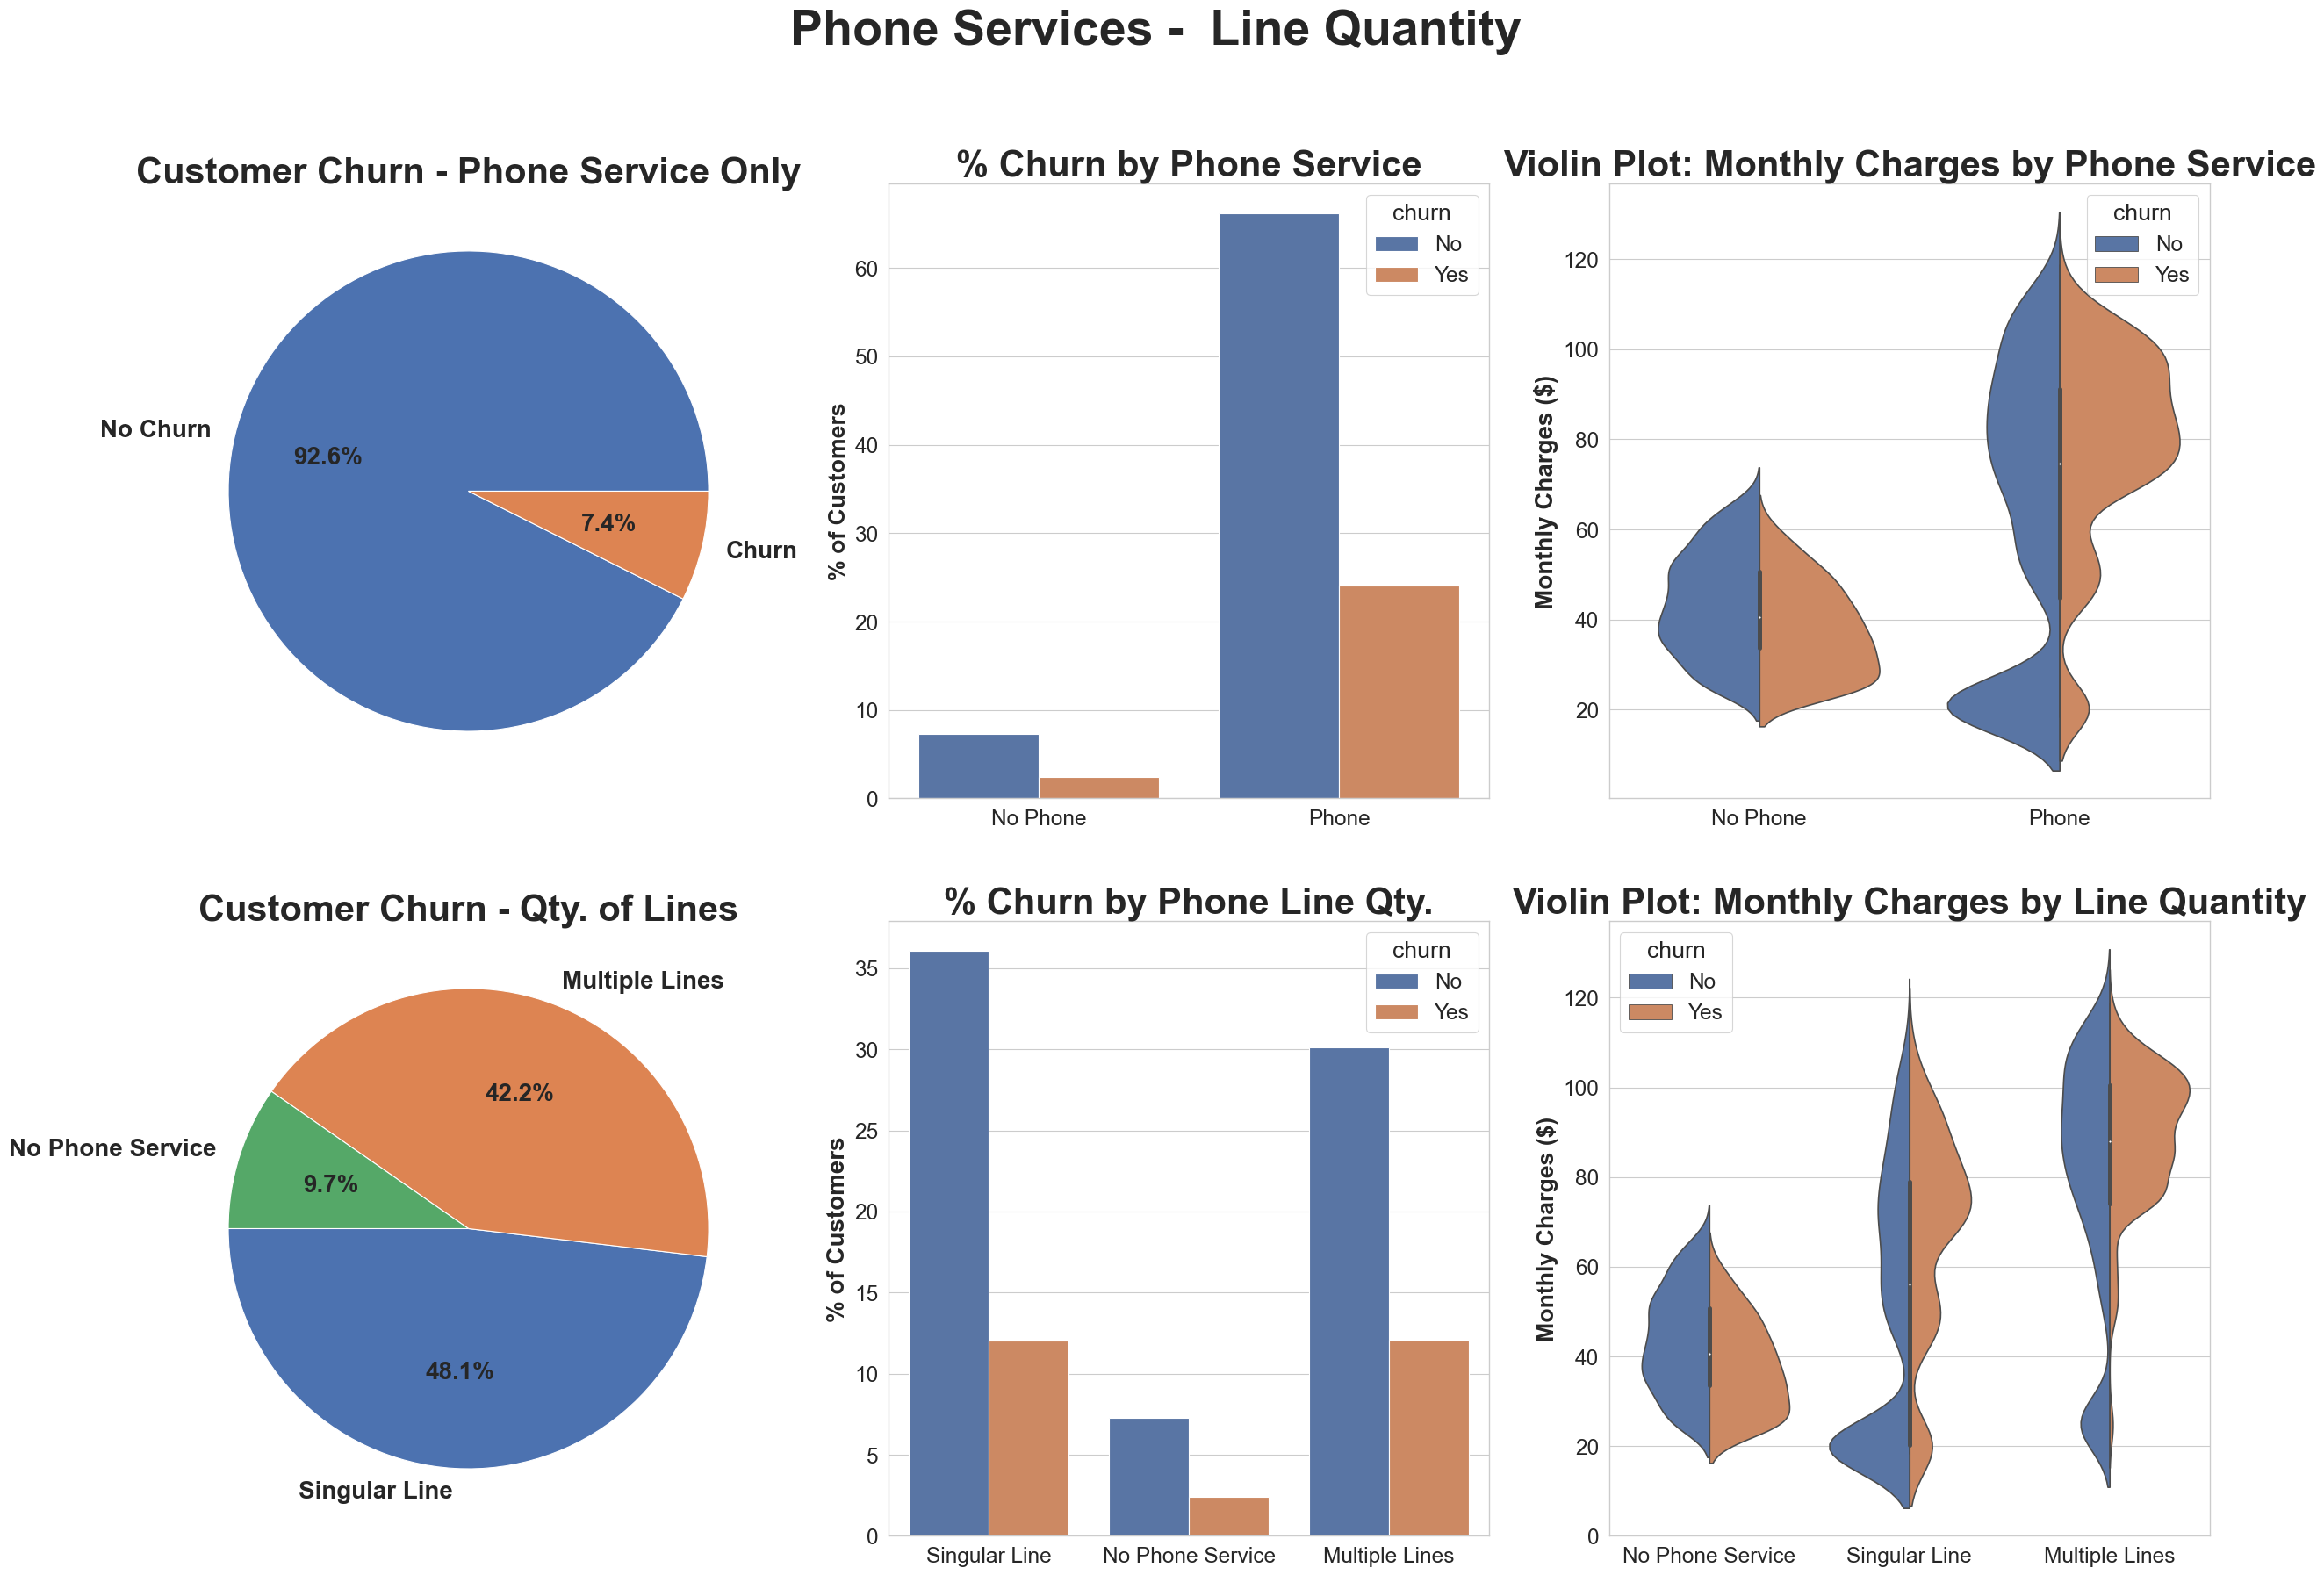

In [12]:
phone_only = data[(data.phoneservice == 'Yes') & (data.internetservice == 'No')]
    
fig = plt.figure(figsize = (30, 20))

plt.subplot(231)
plt.pie(phone_only.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customer Churn - Phone Service Only', fontsize = 30, fontweight = 'bold')
    
plt.subplot(232)
z = data.copy()
z = z.groupby('phoneservice')['churn'].value_counts().to_frame()
z = z.rename({'churn':'pct_total'}, axis = 1).reset_index()
z['pct_total'] = (z['pct_total']/len(data)) * 100
a = sns.barplot( x = 'phoneservice', y = 'pct_total', hue = 'churn', data = z)
a.set_title('% Churn by Phone Service', fontsize = 30, fontweight = 'bold')
a.set(xticklabels = ['No Phone', 'Phone'])
a.set_xlabel('')
a.set_ylabel('% of Customers', fontweight = 'bold')
    
    
plt.subplot(233)
v1 = sns.violinplot(x = 'phoneservice', y = 'monthlycharges',hue ='churn', data = data, split = True)
v1.set_title('Violin Plot: Monthly Charges by Phone Service', fontsize = 30, fontweight = 'bold')
v1.set_xlabel('')
v1.set_ylabel('Monthly Charges ($)', fontsize = 20, fontweight = 'bold')
v1.set(xticklabels = ['No Phone', 'Phone'])
    
plt.subplot(234)
plt.pie(data.multiplelines.value_counts(), labels = ['Singular Line', 'Multiple Lines', 'No Phone Service'], autopct = '%.1f%%', radius = 1, textprops = {'fontweight':'bold', 'fontsize': 20}, startangle = 180)
plt.title('Customer Churn - Qty. of Lines', fontsize = 30, fontweight = 'bold')
    

    
plt.subplot(235)
bb = data.copy()
bb = bb.groupby('multiplelines')['churn'].value_counts().to_frame()
bb = bb.rename({'churn':'pct_total'}, axis = 1).reset_index()
bb['pct_total'] = (bb['pct_total']/len(data)) * 100
c = sns.barplot(x ='multiplelines', y = 'pct_total', hue = 'churn', data = bb)
c.set(xticklabels = ['Singular Line', 'No Phone Service', 'Multiple Lines'])
c.set_title('')
c.set_xlabel('')
c.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
c.set_title('% Churn by Phone Line Qty.', fontsize = 30, fontweight = 'bold')
    
plt.subplot(236)
v = sns.violinplot(x = 'multiplelines', y = 'monthlycharges',hue= 'churn', data = data, split = True)
v.set_title('Violin Plot: Monthly Charges by Line Quantity', fontweight = 'bold', fontsize = 30)
v.set_xlabel('')
v.set_ylabel('Monthly Charges ($)', fontweight = 'bold')
v.set(xticklabels = ['No Phone Service', 'Singular Line', 'Multiple Lines'])
    
fig.suptitle('Phone Services -  Line Quantity', fontweight = 'bold', fontsize = 40)


* Customers with phone service are significantly less likely to churn.
* Customers with phone service pay a higher monthly charge.
* Multiple lines and Singular lines customers have approximately the same rate of churning
* Customer with multiple lines pay a higher monthly charge.

### Internet service

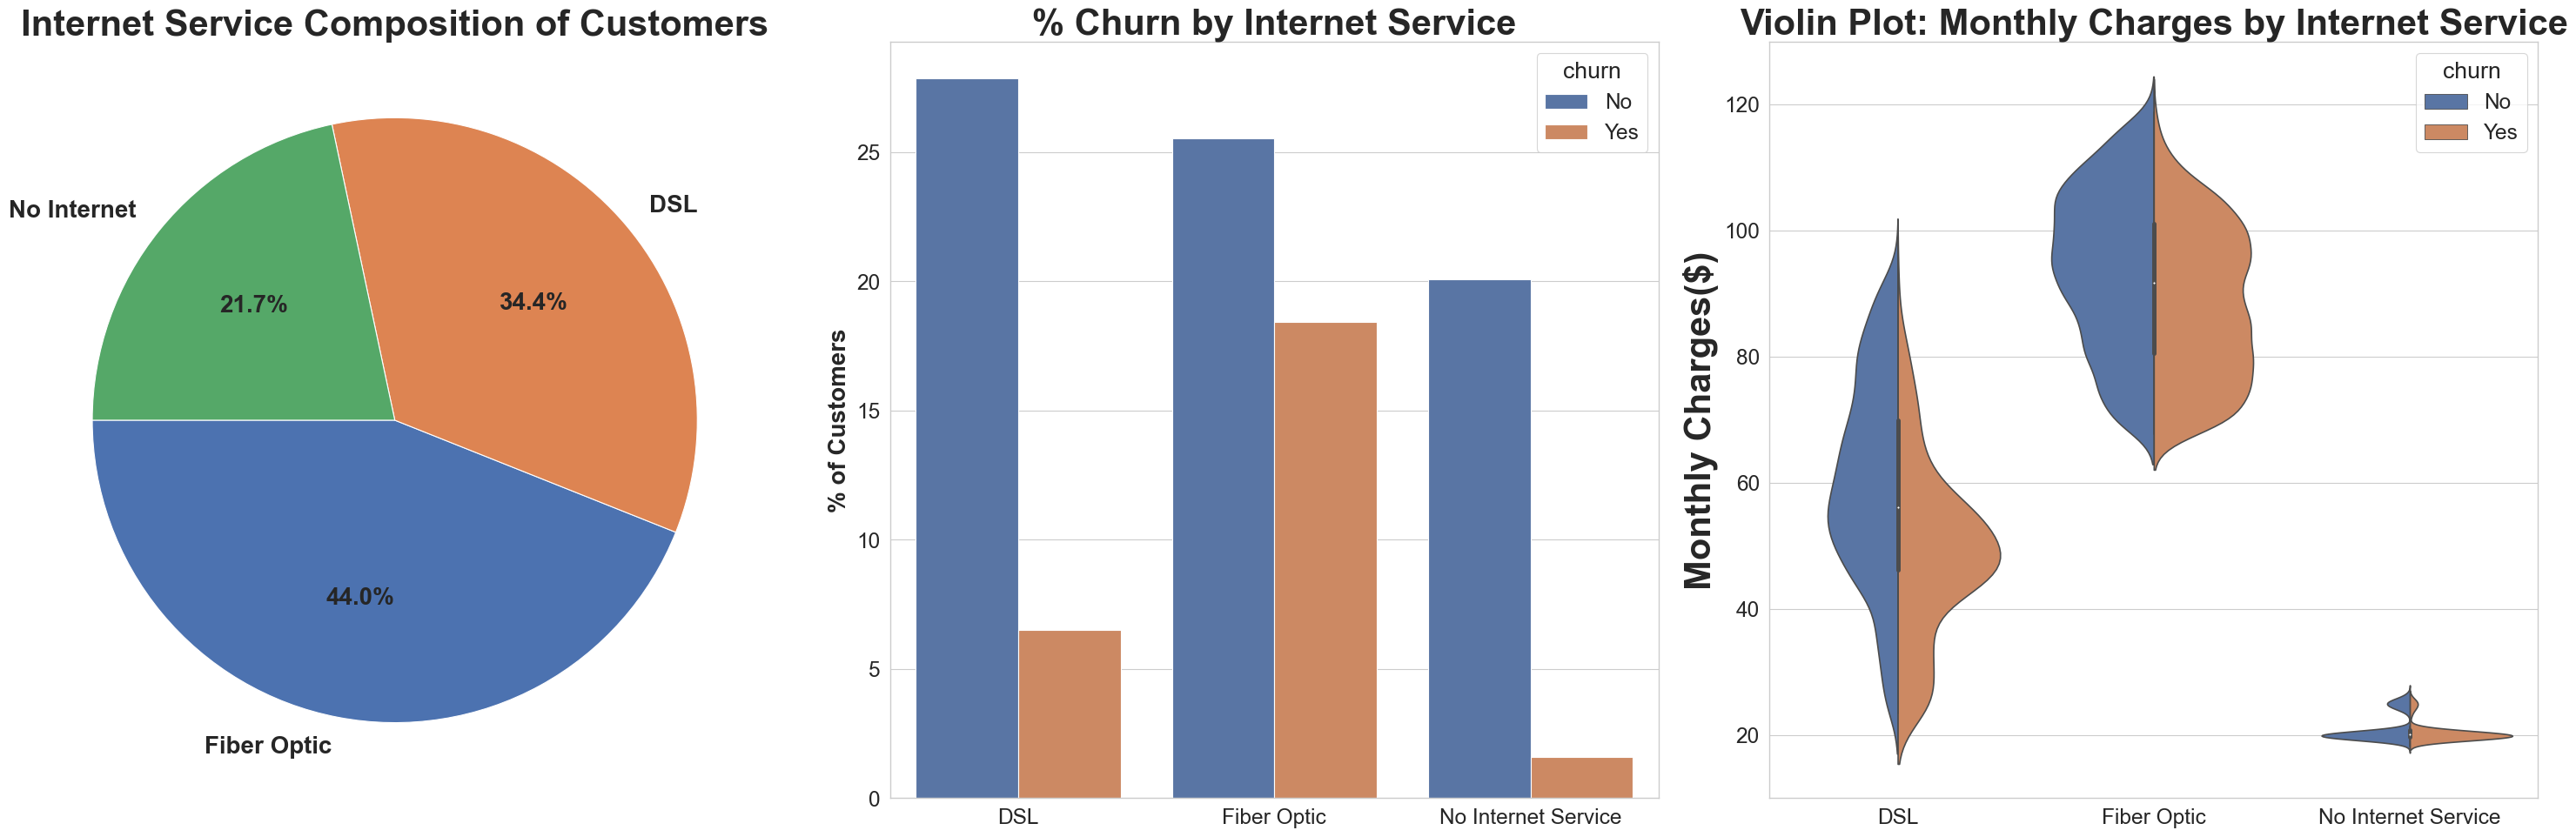

In [13]:
copy = data.copy()
fig = plt.figure(figsize = (30, 10))

plt.subplot(131)
plt.pie(copy.internetservice.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
plt.title('Internet Service Composition of Customers', fontweight = 'bold', fontsize = 30)
    
plt.subplot(132)
copy = copy.groupby('internetservice')['churn'].value_counts().to_frame()
copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
copy['pct_total'] = (copy['pct_total']/len(data)) * 100
d = sns.barplot(x= 'internetservice', y = 'pct_total', hue = 'churn', data = copy)
d.set_title('% Churn by Internet Service', fontweight= 'bold', fontsize = 30)
d.set_xlabel('')
d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
d.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    
plt.subplot(133)
e = sns.violinplot(x='internetservice', y='monthlycharges', hue='churn', data = data, split = True)
e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight = 'bold', fontsize = 30)
e.set_xlabel('')
e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
e.set_ylabel('Monthly Charges($)', fontweight = 'bold', fontsize = 30)

fig.tight_layout()

### Add-on Services

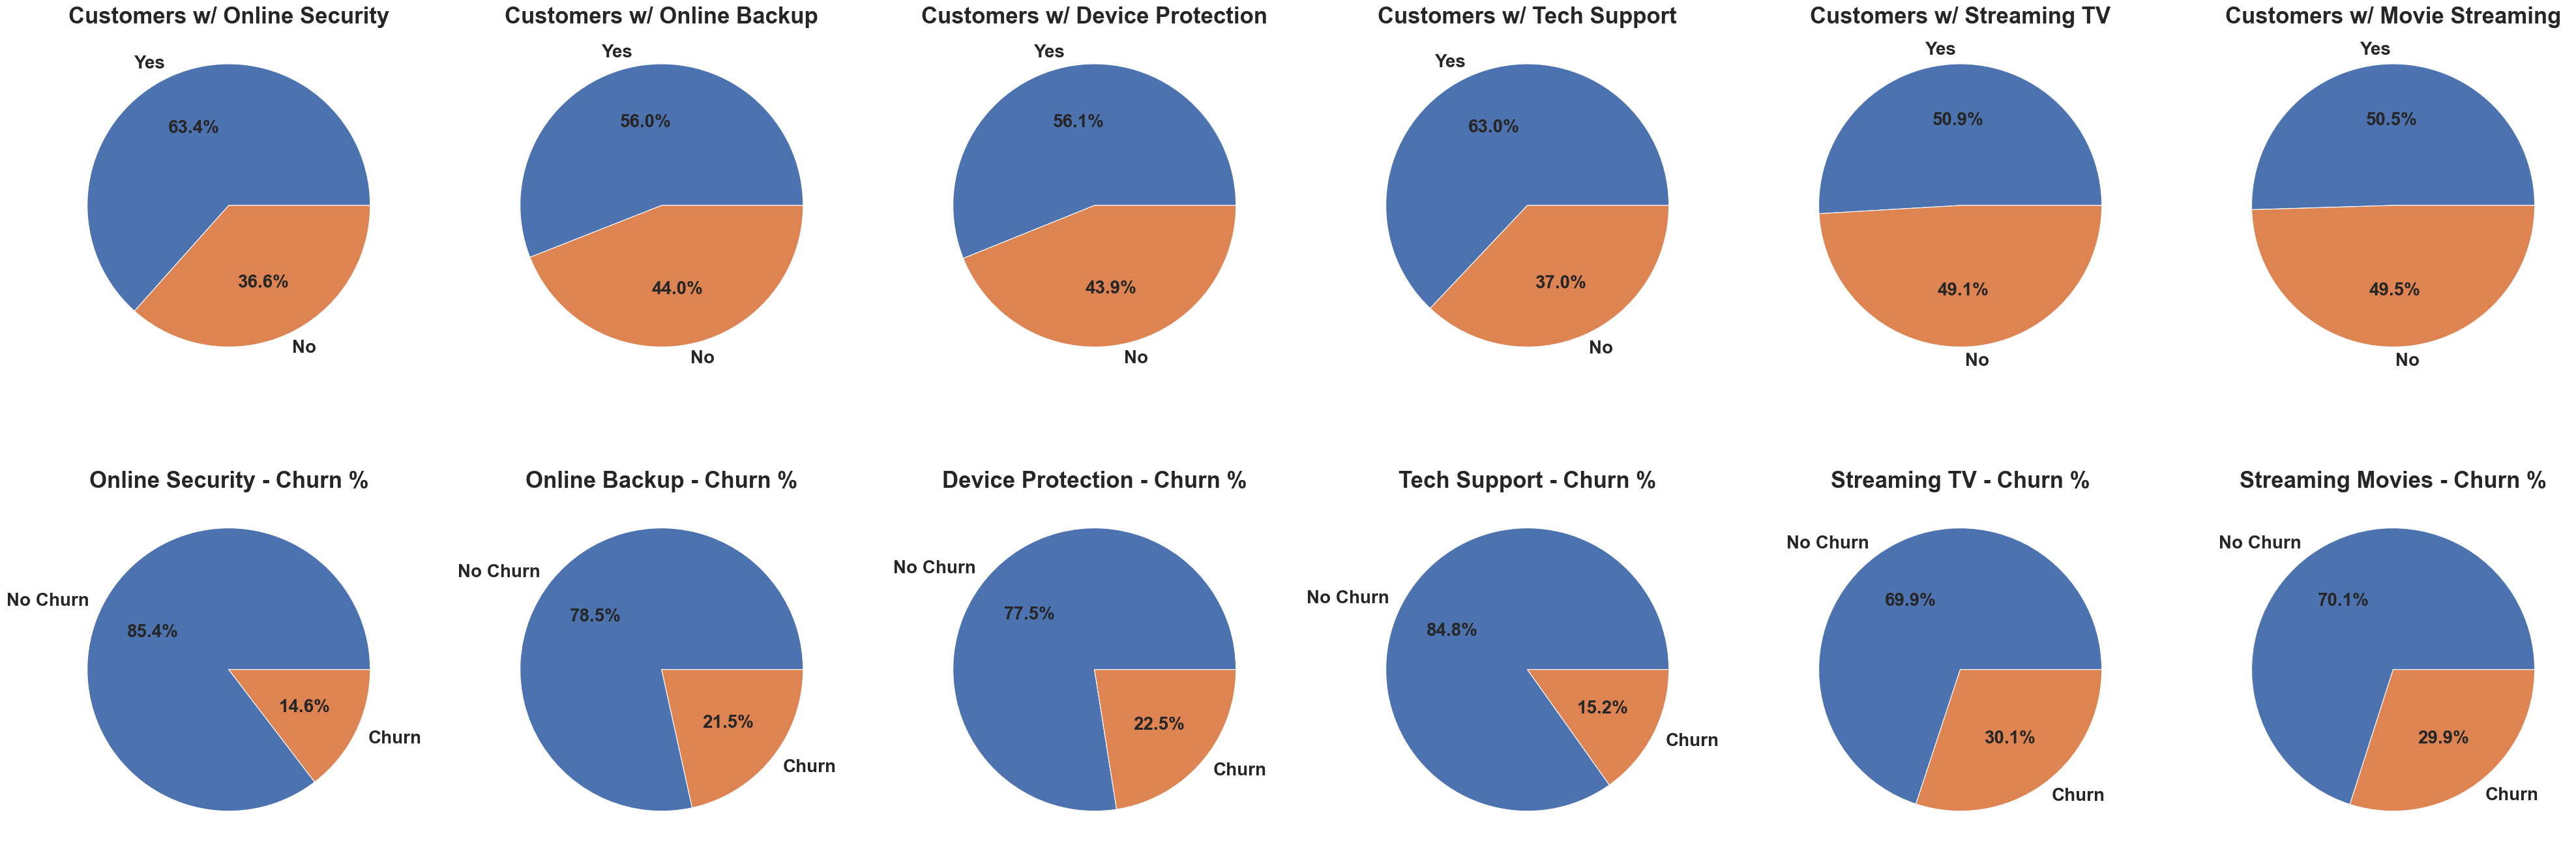

In [14]:
copy = data[data.internetservice != 'No']
    
fig = plt.figure(figsize = (40, 15))
    
plt.subplot(261)
plt.pie(copy.onlinesecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
plt.subplot(262)
plt.pie(copy.onlinebackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
plt.subplot(263)
plt.pie(copy.deviceprotection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
plt.subplot(264)
plt.pie(copy.techsupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
plt.subplot(265)
plt.pie(copy.streamingtv.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
plt.subplot(266)
plt.pie(copy.streamingmovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
plt.subplot(267)
copy1 = copy[copy.onlinesecurity == 'Yes']
plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
plt.subplot(268)
copy2 = copy[copy.onlinebackup == 'Yes']
plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
plt.subplot(269)
copy3 = copy[copy.deviceprotection == 'Yes']
plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
plt.subplot(2,6,10)
copy4 = copy[copy.techsupport == 'Yes']
plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
plt.subplot(2,6,11)
copy5 = copy[copy.streamingtv == 'Yes']
plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
plt.subplot(2,6,12)
copy6 = copy[copy.streamingmovies == 'Yes']
plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\1723537235.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticks(), size = 25, weight = 'bold')


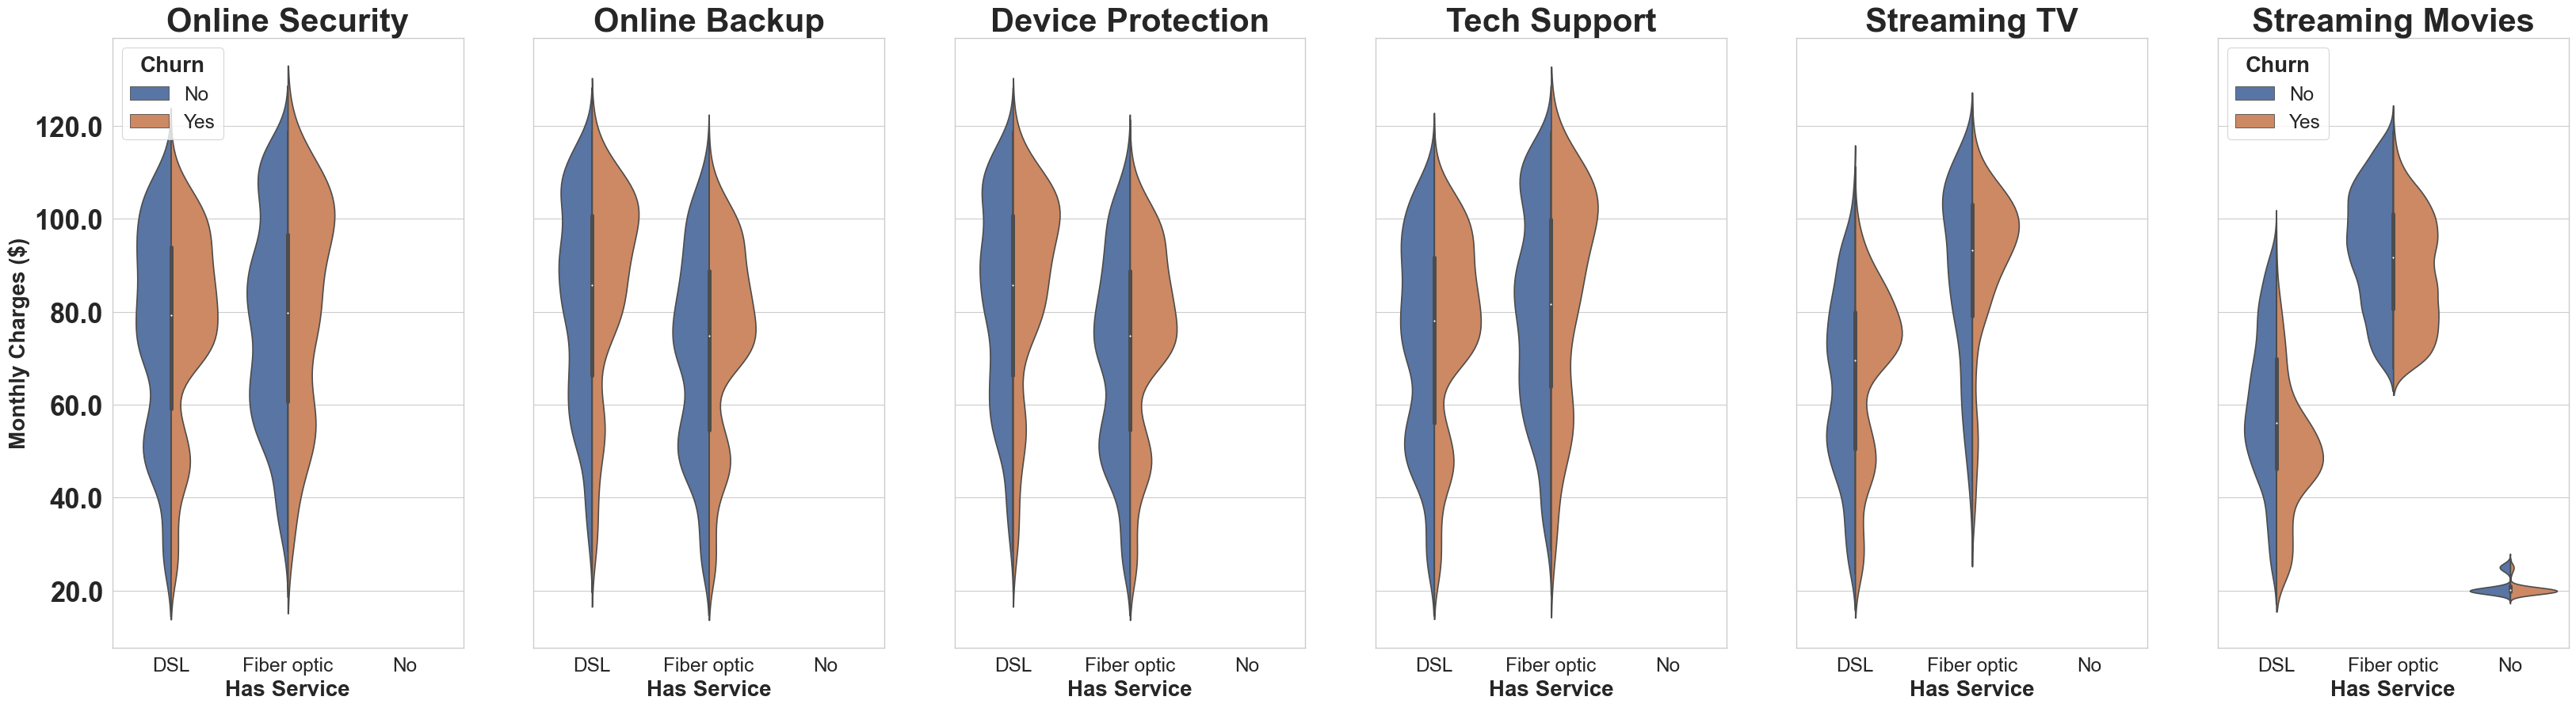

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (40, 10), sharex = True, sharey = True)
    
copy1 = data[data.onlinesecurity != 'No internet service']
a = sns.violinplot(x='onlinesecurity', y='monthlycharges',hue= 'churn', data=copy1, split = True, ax = axes[0])
a.set_title('Online Security', fontsize = 30, fontweight = 'bold')
a.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
a.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
a.set_yticklabels(a.get_yticks(), size = 25, weight = 'bold')
a.legend(loc = 'upper left', )
a.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})

copy2 = data[data.onlinebackup != 'No internet service']
b = sns.violinplot(x='onlinebackup', y='monthlycharges', hue='churn',data= copy2, split = True, ax = axes[1])
b.set_title('Online Backup', fontweight = 'bold', fontsize = 30)
b.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
b.set_ylabel('')
b.legend_.remove()
    
copy3 = data[data.deviceprotection != 'No internet service']
c = sns.violinplot(x='onlinebackup',y= 'monthlycharges', hue='churn', data=copy3, split = True, ax = axes[2])
c.set_title('Device Protection', fontweight = 'bold', fontsize = 30)
c.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
c.set_ylabel('')
c.legend_.remove()
    
copy4 = data[data.techsupport != 'No internet service']
d = sns.violinplot(x='techsupport',y= 'monthlycharges',hue= 'churn',data= copy3, split = True, ax = axes[3])
d.set_title('Tech Support', fontsize = 30, fontweight = 'bold')
d.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
d.set_ylabel('')
d.legend_.remove()
    
copy5 = data[data.streamingtv != 'No internet service']
e = sns.violinplot(x='streamingtv',y= 'monthlycharges', hue='churn',data= copy4, split = True, ax = axes[4])
e.set_title('Streaming TV', fontsize = 30, fontweight = 'bold')
e.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
e.set_ylabel('')
e.legend_.remove()
    
copy5 = data[data.streamingmovies != 'No internet service']
f = sns.violinplot(x='internetservice', y='monthlycharges', hue='churn', data = data, split = True,ax=axes[5])
f.set_title('Streaming Movies', fontweight = 'bold', fontsize = 30)
f.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
f.set_ylabel('')
f.legend(loc = 'upper left')
f.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})
    
    

* Customers with streaming services churn the most.
* Monthly charge peak around $100.

### Contracts

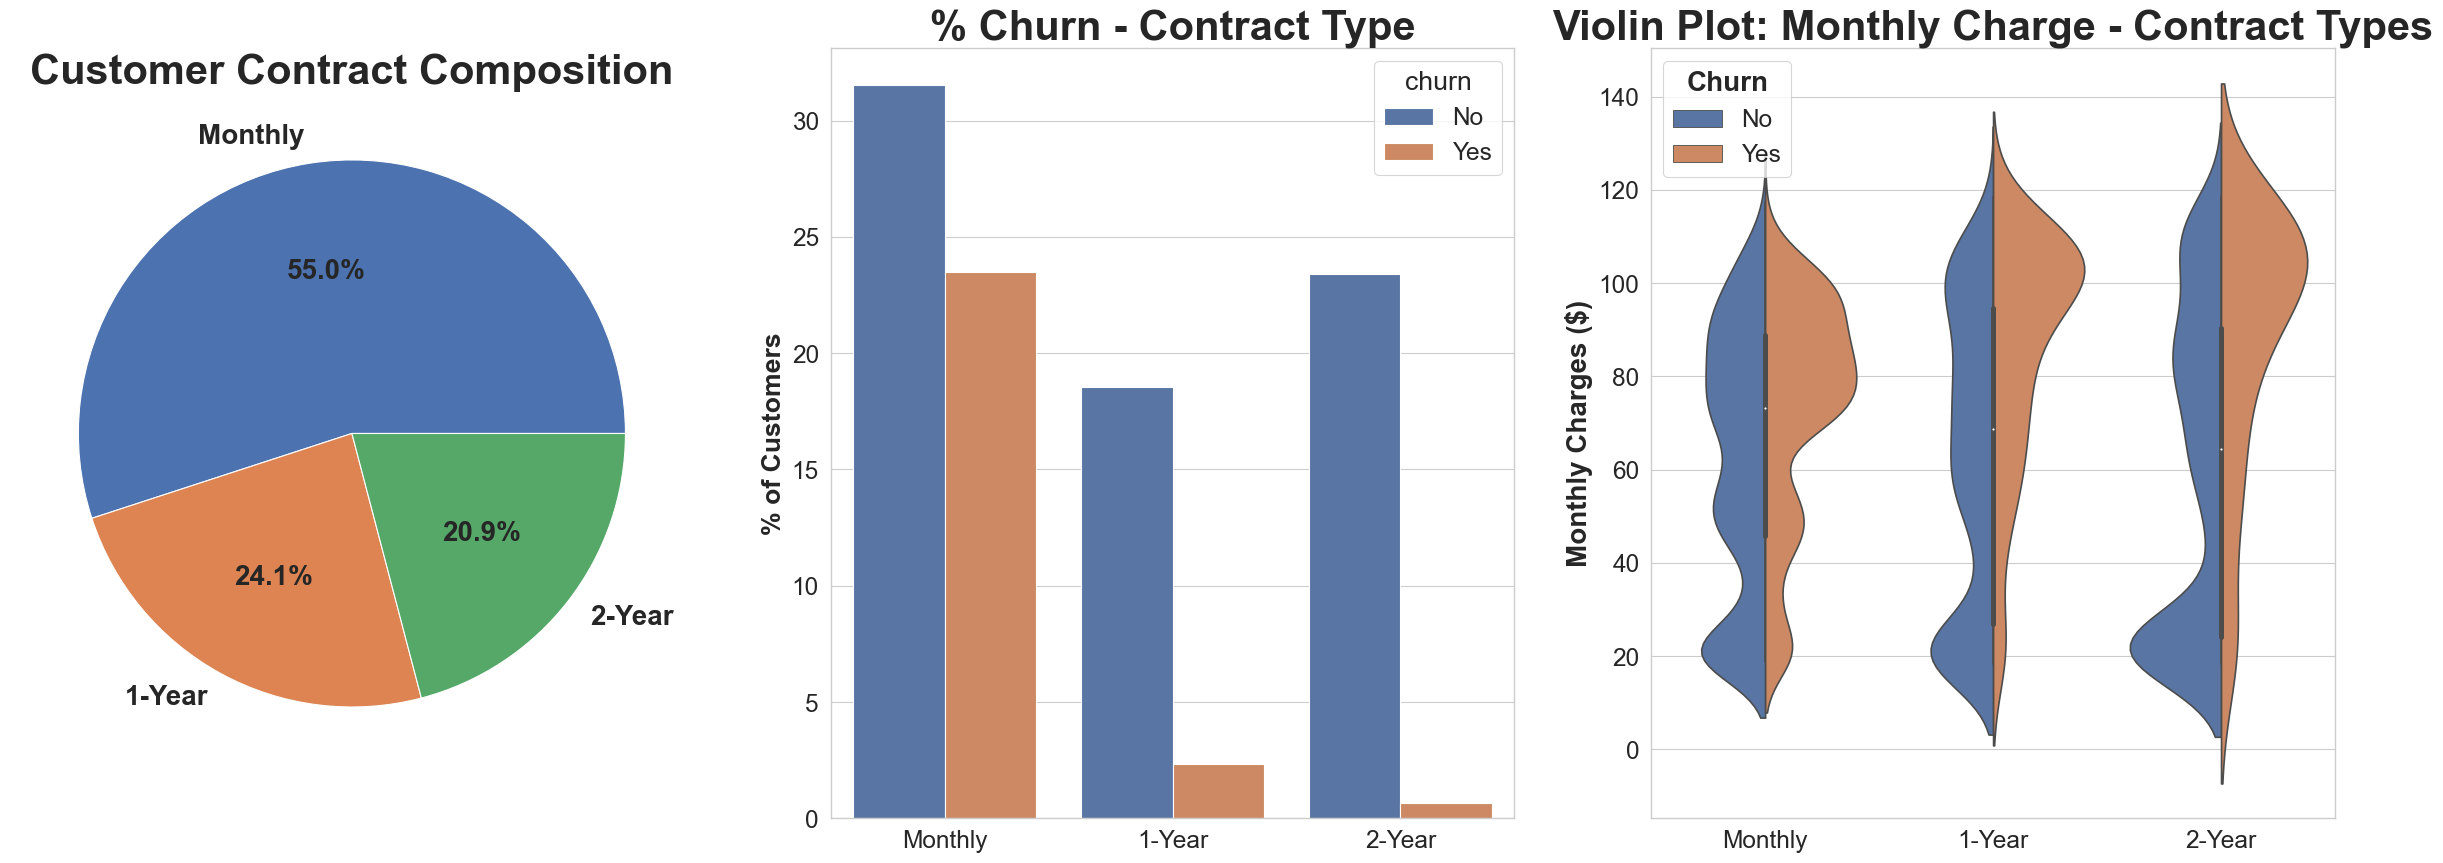

In [16]:
copy = data.copy()
    
plt.figure(figsize = (30, 10))
    
plt.subplot(131)
plt.pie(copy.contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
plt.subplot(132)
plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
copy = copy.groupby('contract')['churn'].value_counts().to_frame()
copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
copy['pct_total'] = (copy['pct_total']/len(data)) * 100
a = sns.barplot(x='contract', y = 'pct_total', hue = 'churn', data = copy)
a.set_title('% Churn - Contract Type', fontsize = 30, fontweight = 'bold')
a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
a.set_xlabel('')
a.set_ylabel('% of Customers', fontweight = 'bold')

plt.subplot(133)
b = sns.violinplot(x='contract', y='monthlycharges', hue='churn', data = data, split = True)
b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
b.set_xlabel('')
b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
b.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
b.legend(loc = 'upper left')
b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
    

* More than half of the customers use a monthly payment plan.
* Significantly more customers churn on monthly plan.
* The longer the contract, the lower the churn rate.
* The longer the contract, the higher the monthly charges.

### Paperless Billing & Payment Methods

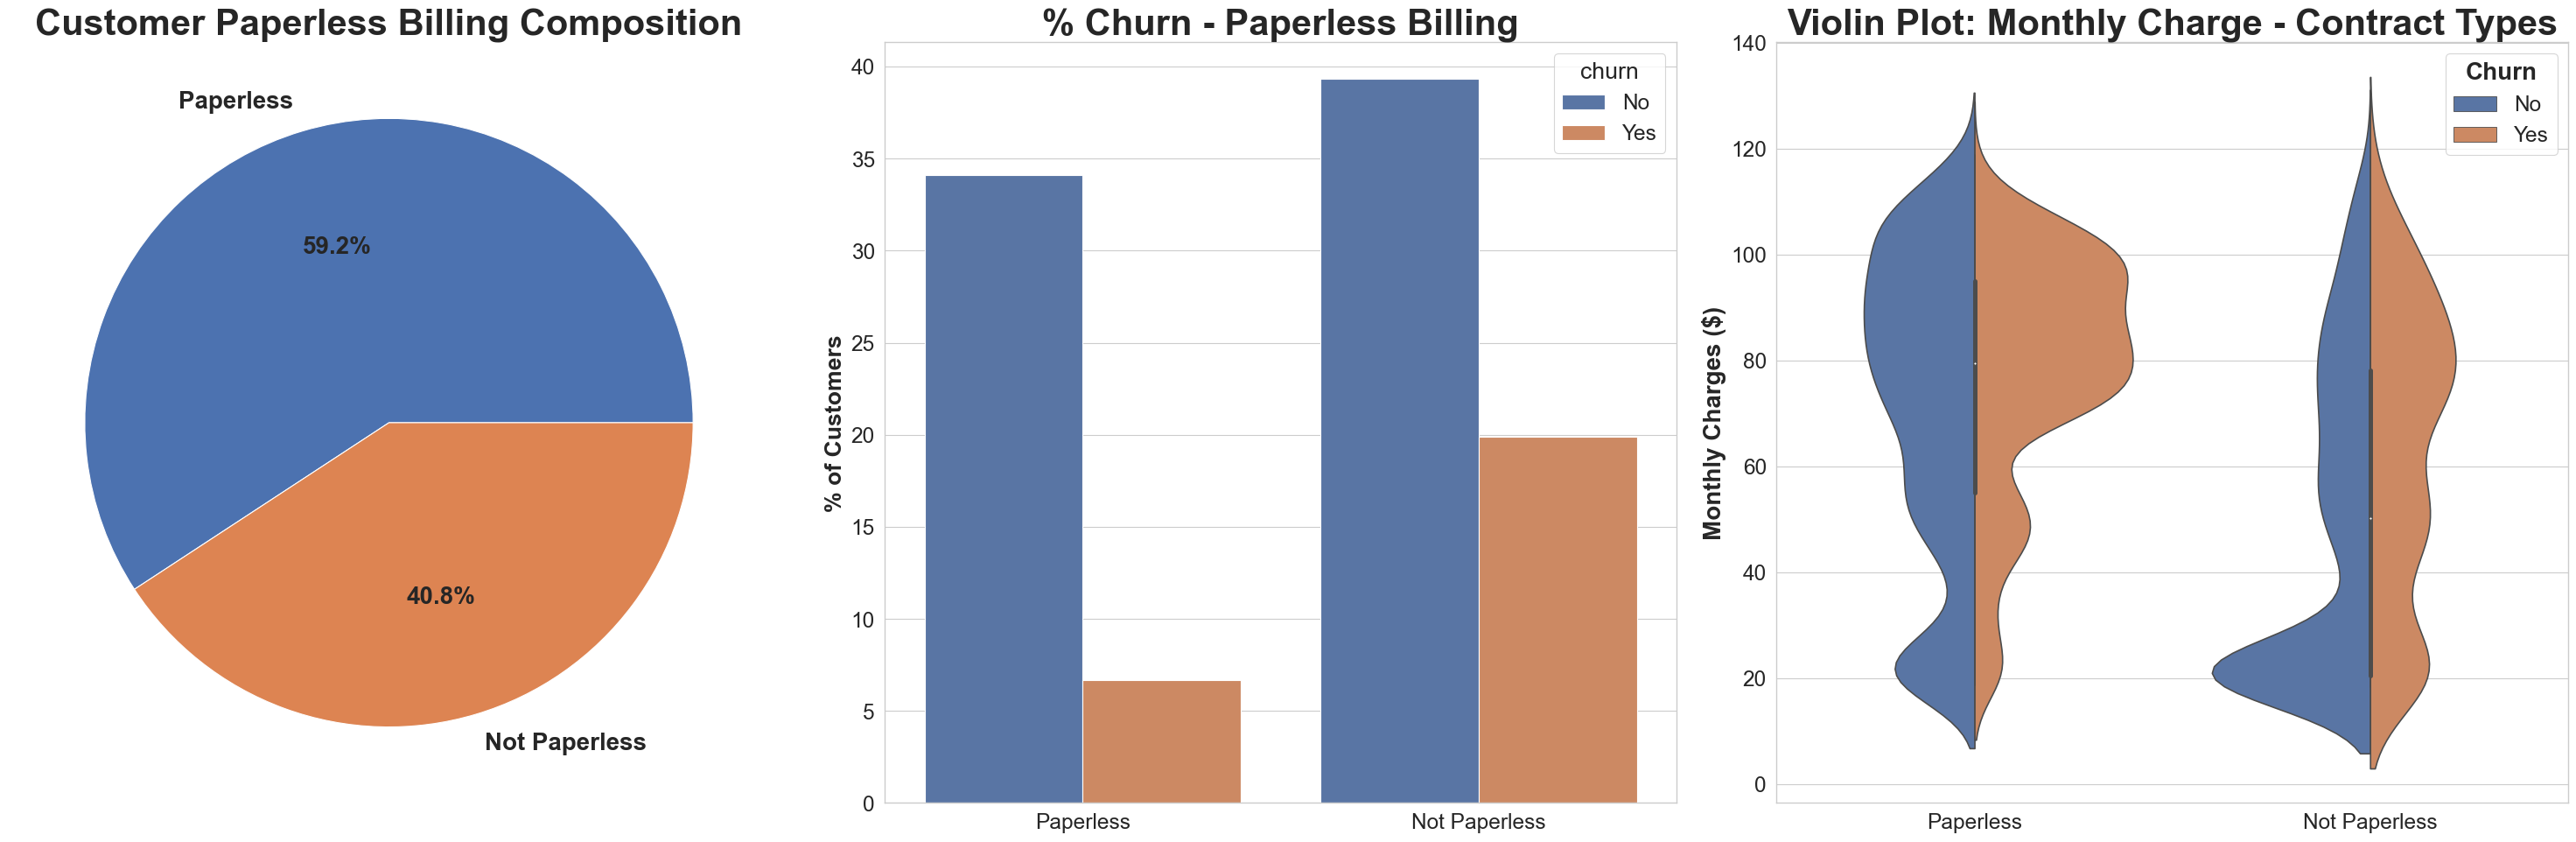

In [17]:
copy = data.copy()
    
plt.figure(figsize = (30, 10))
    
plt.subplot(131)
plt.pie(copy.paperlessbilling.value_counts(), labels = ['Paperless', 'Not Paperless'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)
    
plt.subplot(132)
plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
copy = copy.groupby('paperlessbilling')['churn'].value_counts().to_frame()
copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
copy['pct_total'] = (copy['pct_total']/len(data)) * 100
a = sns.barplot(x='paperlessbilling', y = 'pct_total', hue = 'churn', data = copy)
a.set_title('% Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
a.set(xticklabels = ['Paperless', 'Not Paperless'])
a.set_xlabel('')
a.set_ylabel('% of Customers', fontweight = 'bold')
    
plt.subplot(133)
b = sns.violinplot(x='paperlessbilling', y='monthlycharges', hue='churn', data = data, split = True)
b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
b.set_xlabel('')
b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
b.set(xticklabels = ['Paperless', 'Not Paperless'])
b.legend(loc = 'upper right')
b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
plt.tight_layout()

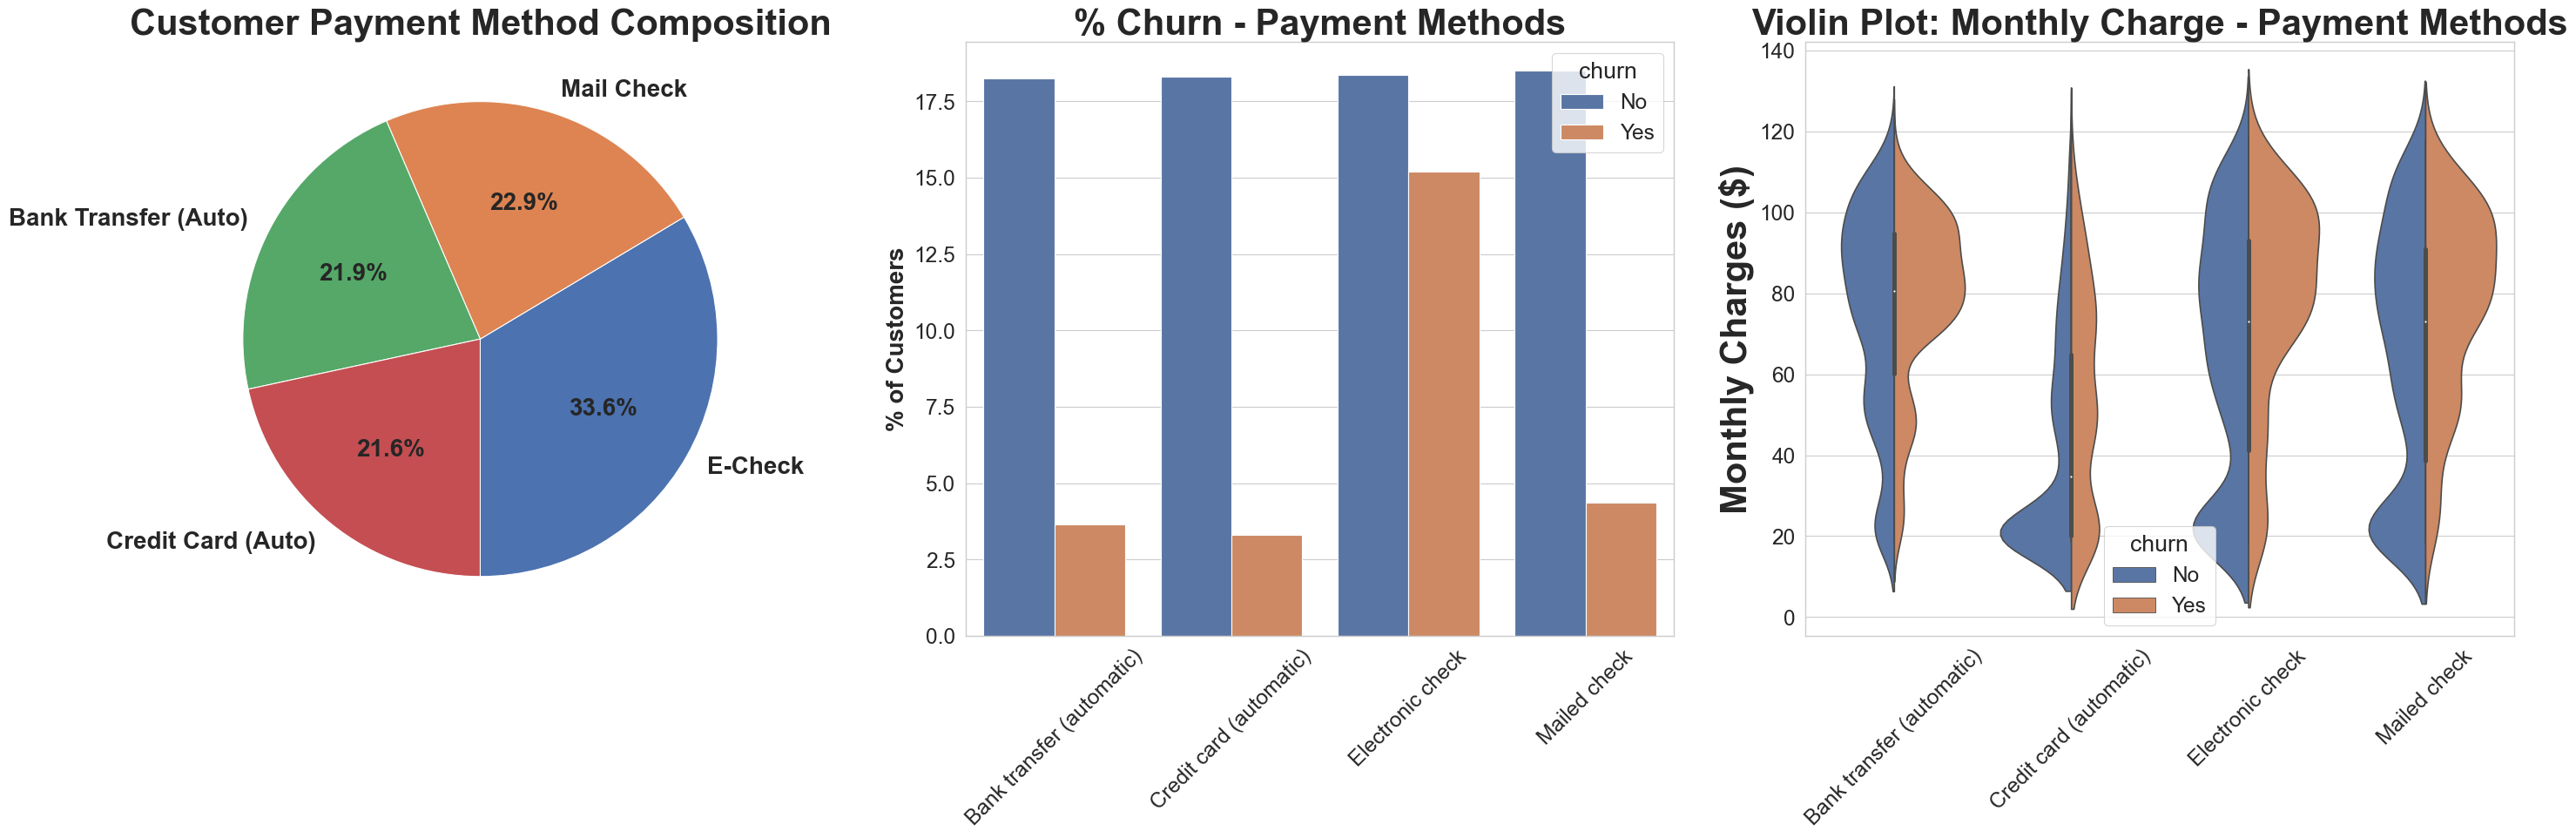

In [18]:
copy = data.copy()
    
plt.figure(figsize = (30, 10))
    
plt.subplot(131)
plt.pie(copy.paymentmethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
plt.subplot(132)
copy = copy.groupby('paymentmethod')['churn'].value_counts().to_frame()
copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
copy['pct_total'] = (copy['pct_total']/len(data))*100
a = sns.barplot(x='paymentmethod',y= 'pct_total',hue= 'churn', data = copy)
a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
a.set_xlabel('')
a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
a.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
plt.subplot(133)
c = sns.violinplot(x='paymentmethod', y='monthlycharges', hue='churn', data = data, split = True)
c.set_title('Violin Plot: Monthly Charge - Payment Methods', fontsize = 30, fontweight = 'bold')
c.set_xlabel('')
c.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 30)
c.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
plt.tight_layout()

* Customers with non-paperless billing have nearly 15% higher churn rate.
* when the monthly charge is below $60, paperless and non-paperless billing customers churn at similar rates. Once charge is above $60, more paperless customers churn.
* Customers paying by creditc card have consistent churn rates regardless of the monthly charges.
* When the monthly charges in above &60, there is a small increase in the churn rate ofcustomers paying by bank transfer, e-check, mail-check.

In [19]:
from sklearn.preprocessing import RobustScaler

# Scaling to normalize data
X_copy = X.copy()
rc = RobustScaler()
X_rc=rc.fit_transform(X_copy)
X_rc=pd.DataFrame(X_rc,columns=X.columns)

In [20]:
X_rc.join(y).to_csv(product['data'], index=False)